<a href="https://colab.research.google.com/github/Varshini151205/ML/blob/main/week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn import metrics

In [ ]:
#load data
df=pd.read_csv('/content/drive/MyDrive/ml lab /house_price_train.csv')
df.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [103]:
#data
X=df[['YearBuilt']]
Y=df[['SalePrice']]

In [104]:
#train and test split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

In [105]:
#fit
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
#SGD
sgd = SGDRegressor(max_iter=200, random_state=42, average=False)
sgd.fit(X_train, Y_train)
y_pred_sgd = sgd.predict(X_test)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [106]:
#GD
gd = SGDRegressor(max_iter=200, random_state=42, average=True)
gd.fit(X_train, Y_train)
y_pred_gd = gd.predict(X_test)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [107]:
mse_sgd = metrics.mean_squared_error(Y_test, y_pred_sgd)
r2_sgd = metrics.r2_score(Y_test, y_pred_sgd)

mse_gd = metrics.mean_squared_error(Y_test, y_pred_gd)
r2_gd = metrics.r2_score(Y_test, y_pred_gd)

In [109]:
print(f"SGD Regressor - MSE: {mse_sgd:.2f}, R2: {r2_sgd:.4f}")
print(f"GD (averaged SGD) - MSE: {mse_gd:.2f}, R2: {r2_gd:.4f}")


SGD Regressor - MSE: 7829361928.36, R2: -0.0978
GD (averaged SGD) - MSE: 5159095212.68, R2: 0.2766


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn import metrics
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('/content/drive/MyDrive/ml lab /house_price_train.csv')

#data
X = df[['YearBuilt']]
Y = df['SalePrice']

# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

learning_rates = [0.001, 0.01, 0.1]
epochs_list = [100, 200, 500]

results = []

for lr in learning_rates:
    for epochs in epochs_list:
        sgd = SGDRegressor(max_iter=epochs, learning_rate='constant', eta0=lr, random_state=42, average=False)
        sgd.fit(X_train, Y_train)
        y_pred = sgd.predict(X_test)
        mse = metrics.mean_squared_error(Y_test, y_pred)
        r2 = metrics.r2_score(Y_test, y_pred)
        results.append((lr, epochs, mse, r2))
        print(f"LR: {lr}, Epochs: {epochs} => MSE: {mse:.2f}, R2: {r2:.4f}")




LR: 0.001, Epochs: 100 => MSE: 5154897202.01, R2: 0.2772
LR: 0.001, Epochs: 200 => MSE: 5154897202.01, R2: 0.2772
LR: 0.001, Epochs: 500 => MSE: 5154897202.01, R2: 0.2772
LR: 0.01, Epochs: 100 => MSE: 5205101644.38, R2: 0.2702
LR: 0.01, Epochs: 200 => MSE: 5205101644.38, R2: 0.2702
LR: 0.01, Epochs: 500 => MSE: 5205101644.38, R2: 0.2702
LR: 0.1, Epochs: 100 => MSE: 5129922813.17, R2: 0.2807
LR: 0.1, Epochs: 200 => MSE: 5129922813.17, R2: 0.2807
LR: 0.1, Epochs: 500 => MSE: 5129922813.17, R2: 0.2807


# ** REGULARIZATION ON Concrete Compressive Strength(from UCI repo)**

In [78]:
data=pd.read_excel('/content/drive/MyDrive/ml lab /Concrete_Data.xls')
data.head(2)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366


In [82]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [86]:
print(df.dtypes)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object


In [90]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [92]:

# Generate polynomial features (degree 3 for nonlinearity)
poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(X)



In [93]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)



In [94]:
# Feature scaling (important for regularization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [95]:
# Models
lr = LinearRegression()
ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.1, max_iter=10000)

# Fit models
lr.fit(X_train_scaled, y_train)
ridge.fit(X_train_scaled, y_train)
lasso.fit(X_train_scaled, y_train)


Lasso(alpha=0.1, max_iter=10000)

In [96]:

# Predictions
y_train_pred_lr = lr.predict(X_train_scaled)
y_test_pred_lr = lr.predict(X_test_scaled)

y_train_pred_ridge = ridge.predict(X_train_scaled)
y_test_pred_ridge = ridge.predict(X_test_scaled)

y_train_pred_lasso = lasso.predict(X_train_scaled)
y_test_pred_lasso = lasso.predict(X_test_scaled)



In [97]:
# Calculate MSE
print("Mean Squared Error (Train):")
print(f"Linear Regression: {mean_squared_error(y_train, y_train_pred_lr):.3f}")
print(f"Ridge Regression:  {mean_squared_error(y_train, y_train_pred_ridge):.3f}")
print(f"Lasso Regression:  {mean_squared_error(y_train, y_train_pred_lasso):.3f}")

print("\nMean Squared Error (Test):")
print(f"Linear Regression: {mean_squared_error(y_test, y_test_pred_lr):.3f}")
print(f"Ridge Regression:  {mean_squared_error(y_test, y_test_pred_ridge):.3f}")
print(f"Lasso Regression:  {mean_squared_error(y_test, y_test_pred_lasso):.3f}")


Mean Squared Error (Train):
Linear Regression: 19.577
Ridge Regression:  30.300
Lasso Regression:  49.393

Mean Squared Error (Test):
Linear Regression: 40.271
Ridge Regression:  40.293
Lasso Regression:  46.358


In [110]:

# Show number of non-zero coefficients (Lasso performs feature selection)
print("\nNumber of non-zero coefficients:")
print(f"Linear Regression: {np.sum(lr.coef_ != 0)}")
print(f"Ridge Regression:  {np.sum(ridge.coef_ != 0)}")
print(f"Lasso Regression:  {np.sum(lasso.coef_ != 0)}")




Number of non-zero coefficients:
Linear Regression: 164
Ridge Regression:  164
Lasso Regression:  33


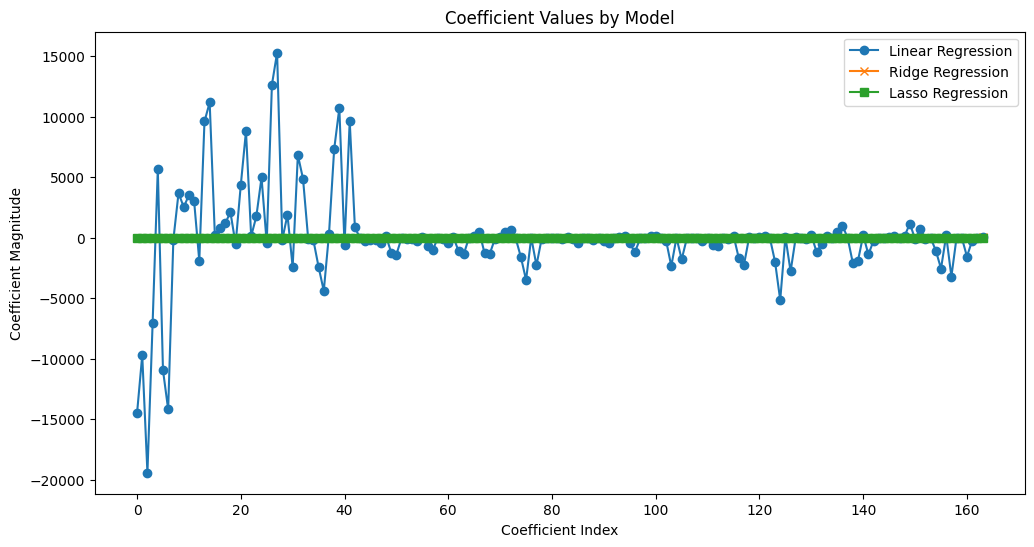

In [112]:
# Plotting coefficients
plt.figure(figsize=(12,6))
plt.plot(lr.coef_, label='Linear Regression', marker='o')
plt.plot(ridge.coef_, label='Ridge Regression', marker='x')
plt.plot(lasso.coef_, label='Lasso Regression', marker='s')
plt.title('Coefficient Values by Model')
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Magnitude')
plt.legend()
plt.show()